# [How Many Dice Can You Roll the Same?](https://thefiddler.substack.com/p/how-many-dice-can-you-roll-the-same)
## October 4 2024

## Problem

_To get started, you roll all 10 dice—whichever number comes up most frequently becomes your target number. In the event multiple numbers come up most frequently, you can choose your target number from among them. At this point, you put aside all the dice that came up with your target number._

_From there, you continue rolling any remaining dice, putting aside any that come up with your target number. Once all 10 dice show the same number, you yell, “Tenzi!” If you’re the first to do so, you win._

_Now, consider a simplified version of the game in which you begin with three total dice (call it “THREEZI”)._

_On average, how many dice will you put aside after first rolling all three?_

## Solution

We are finding an expectation here. The case with three dice isn't too hard to figure out by hand. The probability of 1 die being set aside is the same as all three being different

$$ P(D=1) = \frac{6}{6} \cdot \frac{5}{6} \cdot \frac{4}{6} = \frac{5}{9}$$

The probability of 2 dice being set aside is the same as two of the dice being the same and the third being different. There's 3 choose 2 ways to pick the two dice that are the same.

$$ P(D=2) = 3 \cdot \frac{6}{6} \cdot \frac{1}{6} \cdot \frac{5}{6} = \frac{5}{12}$$

The probability of 3 dice being set aside is the same as all three being the same.

$$ P(D=3) = \frac{6}{6} \cdot \frac{1}{6} \cdot \frac{1}{6} = \frac{1}{36}$$

The expected number of dice set aside is then

$$ E(D) = 1 \cdot P(D=1) + 2 \cdot P(D=2) + 3 \cdot P(D=3) = \frac{5}{9} + \frac{10}{12} + \frac{1}{12} = \boxed{\frac{53}{36}}$$

## Extra Credit

This one is bit more complicated. We probably want a more systematic approach.  First, there are %6^{10}$ possible outcomes.

For 10 dice, there are 6 ways to choose the target number. 

$$ P(D=10) = \frac{6}{6^{10}} $$

For 9 dice, there are 6 ways to choose the target number and 5 ways to choose the last die.

$$ P(D=9) = \frac{6 \cdot 5}{6^{10}} $$

Continuing this pattern, we get

$$ P(D=8) = \frac{6 \cdot 5 \cdot 4}{6^{10}} $$

$$ P(D=7) = \frac{6 \cdot 5 \cdot 4 \cdot 3}{6^{10}} $$
$$ P(D=6) = \frac{6 \cdot 5 \cdot 4 \cdot 3 \cdot 2}{6^{10}} $$
$$ P(D=5) = \frac{6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1}{6^{10}} $$

Now here's where things get a bit tricky. When consider a max of 4 dice being set aside, we need to ensure that the remaining dice don't have a cluster of greater than 4. To do this, we will first generate each of the ways of partitioning the 10 dice into groups of at most 6 where no group has more than 4. Then for each of these combinations, we will calculate the probability of this roll.  Our formula for each will be 

$$ \text{(Multinomial coefficient)} * \frac{6!}{\text{(\# of unused numbers)}! * \prod \text{(\# of repeated group sizes)}!} $$



In [22]:
def generate_partitions_with_k(n, m, k, current_partition=[], current_sum=0, must_include_k=True, result=None, max_part=None):
    """
    Recursive function to generate partitions and return them in a list.
    
    Parameters:
    - n: total sum to partition
    - m: max number of parts
    - k: largest part size
    - current_partition: current partition being built
    - current_sum: current sum of the partition
    - must_include_k: whether to force at least one group to be of size k
    - result: list to accumulate partitions (defaults to None, initialized in the first call)
    - max_part: upper limit for parts (enforces non-increasing order)
    
    Returns:
    - A list of valid partitions
    """
    
    if result is None:
        result = []
    
    # Base case: if current sum equals n, add the partition to the result list
    if current_sum == n:
        result.append(current_partition)
        return result
    
    # If you exceed the number of parts, stop
    if len(current_partition) >= m:
        return result
    
    # Set the maximum part we can use (initially k, then progressively smaller values to maintain order)
    if max_part is None:
        max_part = k
    
    # If we must include at least one part of size k, start with k
    if must_include_k:
        if current_sum + k <= n:
            generate_partitions_with_k(n, m, k, current_partition + [k], current_sum + k, False, result, k)
    else:
        # If k has already been used, proceed as usual considering parts from 1 to max_part
        for i in range(1, max_part + 1):
            if current_sum + i <= n:
                generate_partitions_with_k(n, m, k, current_partition + [i], current_sum + i, False, result, i)
    
    return result


In [23]:
from math import factorial
from collections import Counter

def compute_rolls_for_partition(partition, n):
    """
    Compute the number of ways to roll dice based on the given partition.
    
    Parameters:
    - partition: a list representing the partition (e.g., [3, 3, 1])
    - n: the number of dice or the number being partitioned
    
    Returns:
    - The number of ways to assign dice values to this partition
    """
    
    # 6! because there are 6 possible values on the dice
    # Factorial part to account for how to assign values to dice
    partition_size = len(partition)
    total_ways = factorial(6) // factorial(6 - partition_size)
    
    # Compute the frequency of each part size (e.g., [3, 3, 1] -> {3: 2, 1: 1})
    counts = Counter(partition)
    
    # Multiply by the multinomial denominator to account for indistinguishable groups
    for count in counts.values():
        total_ways //= factorial(count)
    
    # Now compute how to order the dice
    # Factorial of the total number of dice divided by the factorials of identical groups
    total_ways *= factorial(n)
    for part in partition:
        total_ways //= factorial(part)
    
    return total_ways

In [57]:
counts = []

def combinations(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

for i, n in enumerate(range(10, 4, -1)):
    print((i, n))
    count = 6 * combinations(10,i) * 5**i
    counts.append(count)
    print(f"n = {n}:P = {count/6**10}")

(0, 10)
n = 10:P = 9.92290301275212e-08
(1, 9)
n = 9:P = 4.9614515063760605e-06
(2, 8)
n = 8:P = 0.00011163265889346136
(3, 7)
n = 7:P = 0.0014884354519128181
(4, 6)
n = 6:P = 0.013023810204237159
(5, 5)
n = 5:P = 0.07814286122542295


In [35]:
for n in range(4,1,-1):
    # print(f"n = {n}")
    partitions = generate_partitions_with_k(10, 6, n)
    count = 0
    print(partitions)
    for p in partitions:
        # print(p)
        count += compute_rolls_for_partition(p, 10)
    counts.append(count)
    print(f"n = {n}:P = {count/6**10}")

[[4, 2, 1, 1, 1, 1], [4, 2, 2, 1, 1], [4, 2, 2, 2], [4, 3, 1, 1, 1], [4, 3, 2, 1], [4, 3, 3], [4, 4, 1, 1], [4, 4, 2]]
n = 4:P = 0.31048763526901385
[[3, 2, 2, 1, 1, 1], [3, 2, 2, 2, 1], [3, 3, 1, 1, 1, 1], [3, 3, 2, 1, 1], [3, 3, 2, 2], [3, 3, 3, 1]]
n = 3:P = 0.5292876467001981
[[2, 2, 2, 2, 1, 1], [2, 2, 2, 2, 2]]
n = 2:P = 0.06751543209876543


In [36]:
expectation = 0
for i, c in enumerate(counts):
    expectation += c/6**10 * (10-i)
print(expectation)

3.4450592675151146


In [51]:
def find_fraction(decimal, tolerance=1e-9, max_denominator=10000):
    """
    Find a fraction that approximates the given decimal number.
    
    Parameters:
    - decimal: The decimal number to approximate.
    - tolerance: The acceptable error for the approximation.
    - max_denominator: The maximum value for the denominator to try.
    
    Returns:
    - A tuple (numerator, denominator) that represents the fraction approximation.
    """
    best_numerator = 1
    best_denominator = 1
    best_error = abs(decimal - best_numerator / best_denominator)
    
    for denominator in range(1, max_denominator + 1):
        # Find the best possible numerator for this denominator by rounding
        numerator = round(decimal * denominator)
        
        # Compute the error between the actual decimal and the fraction
        error = abs(decimal - numerator / denominator)
        
        # If the error is within the tolerance, return the fraction
        if error < tolerance:
            return numerator, denominator
        
        # Update the best fraction found so far
        if error < best_error:
            best_numerator, best_denominator = numerator, denominator
            best_error = error
    
    # If no exact match is found, return the best approximation found
    return best_numerator, best_denominator

print(find_fraction(expectation))   

(4358, 1265)


In [6]:
# Simulate a 10 dice roll and find the maximum cluster of same faced dice

import random
from collections import Counter

def roll_dice():
    return random.randint(1, 6)

def play_round(n):
    rolls = [roll_dice() for _ in range(n)]

    face_counts = [0] * 6
    for roll in rolls:
        face_counts[roll - 1] += 1

    # print(rolls)
    # print(face_counts)
    # print(max(face_counts))
    max_count = max(face_counts)

    return max_count

In [7]:
# Simulate
n = 1000000
dice = 10
max_cluster_size_counts = Counter()
for _ in range(n):
    max_cluster_size = play_round(dice)
    max_cluster_size_counts[max_cluster_size] += 1

# Show the probabilities
for i in range(1, dice + 1):
    print(f"Probability of max cluster size {i}: {max_cluster_size_counts[i] / n}")

Probability of max cluster size 1: 0.0
Probability of max cluster size 2: 0.067386
Probability of max cluster size 3: 0.52976
Probability of max cluster size 4: 0.309815
Probability of max cluster size 5: 0.078336
Probability of max cluster size 6: 0.013074
Probability of max cluster size 7: 0.001512
Probability of max cluster size 8: 0.00011
Probability of max cluster size 9: 7e-06
Probability of max cluster size 10: 0.0


In [69]:
from math import ceil
ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
expectations = []
for n in ns:
    counts = []
    for i in range(ceil(n/6), n+1):
        if i >= ceil(n/2):
            count = 6 * combinations(n,i) * 5**(n-i)
            counts.append(count * i)
        else:
            partitions = generate_partitions_with_k(n, 6, i)
            count = 0
            for p in partitions:
                count += compute_rolls_for_partition(p, n)
            counts.append(count * i)
    expectation = 0
    for i, c in enumerate(counts):
        expectation += c/6**n
    expectations.append(expectation)
    print(f"n = {n}: {expectation}")

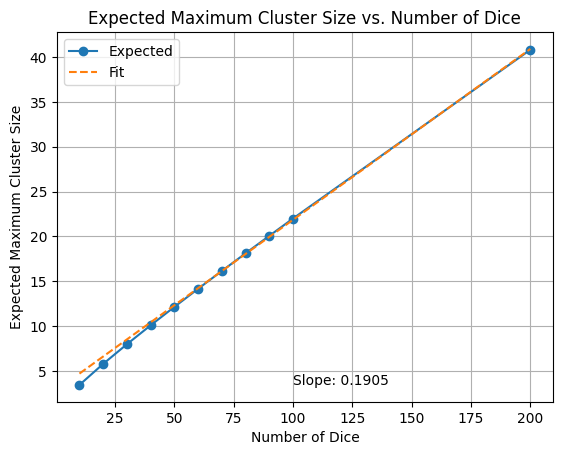

In [73]:
# Graph the results and fit a line with the expected value
import matplotlib.pyplot as plt

# fit a line to the data
from numpy.polynomial import polynomial as P
from numpy import array

# make a slice skipping the first 4 data points
s = slice(4,None)

coefs = P.polyfit(ns[s], expectations[s], 1)
line = P.Polynomial(coefs)

ns = array(ns)
plt.plot(ns, expectations, marker='o')
plt.plot(ns, line(ns), linestyle='--')
plt.legend(['Expected', 'Fit'])
plt.xlabel('Number of Dice')
plt.ylabel('Expected Maximum Cluster Size')
plt.title('Expected Maximum Cluster Size vs. Number of Dice')
plt.grid(True)
# include the slope of the line
plt.text(100, 3.5, f"Slope: {coefs[1]:.4f}")
plt.show()